In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/MyDrive/AdvML_Project1/wines.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Dataframe manipulation:

Handling null values by injecting that features mean value into the spot and creating (one) additional features.

In [3]:
df

,year,rating,num_reviews,body,acidity,price
0,2013.0,4.9,58,5.0,3.0,995.00
1,2018.0,4.9,31,4.0,2.0,313.50
2,2009.0,4.8,1793,5.0,3.0,324.95
3,1999.0,4.8,1705,5.0,3.0,692.96
4,1996.0,4.8,1309,5.0,3.0,778.06
...,...,...,...,...,...,...
7495,2016.0,4.2,392,4.0,3.0,19.98
7496,2018.0,4.2,390,4.0,3.0,16.76
7497,2017.0,4.2,390,4.0,3.0,24.45
7498,2011.0,4.2,389,5.0,3.0,64.50


In [4]:
df.describe()

,year,rating,num_reviews,body,acidity,price
count,7210.000000,7500.000000,7500.000000,6331.000000,6331.000000,7500.000000
mean,2013.495839,4.254933,451.109067,4.158427,2.946612,60.095822
std,6.940450,0.118029,723.001856,0.583352,0.248202,150.356676
min,1910.000000,4.200000,25.000000,2.000000,1.000000,4.990000
25%,2011.000000,4.200000,389.000000,4.000000,3.000000,18.900000
50%,2015.000000,4.200000,404.000000,4.000000,3.000000,28.530000
75%,2017.000000,4.200000,415.000000,5.000000,3.000000,51.350000
max,2021.000000,4.900000,32624.000000,5.000000,3.000000,3119.080000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         7210 non-null   float64
 1   rating       7500 non-null   float64
 2   num_reviews  7500 non-null   int64  
 3   body         6331 non-null   float64
 4   acidity      6331 non-null   float64
 5   price        7500 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 351.7 KB


In [6]:
df.fillna(df.median(), inplace=True)

In [7]:
df["rating_per_year"] = df['rating'] / df['year']

In [8]:
df.corr()["price"].sort_values(ascending=False)

price              1.000000
rating_per_year    0.569600
rating             0.544809
body               0.161068
num_reviews       -0.030083
acidity           -0.039905
year              -0.388726
Name: price, dtype: float64

# Data visualization:

Series of scatter plots to show data's relationship to price. \
Additional plots to show relationships between other data points. Not all that were tried are shown. No scatterplot showed a particularly strong relationship between these other combinations.

<Axes: xlabel='year', ylabel='price'>

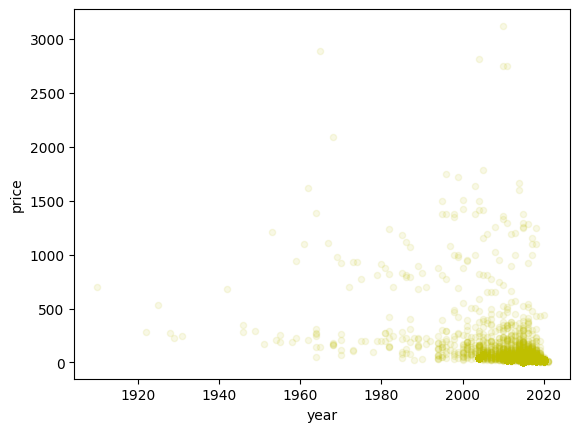

In [9]:
df.plot(kind="scatter", x="year", y='price', color='y', alpha=0.1)

# One of the few features with a noticable relationship

<Axes: xlabel='rating', ylabel='price'>

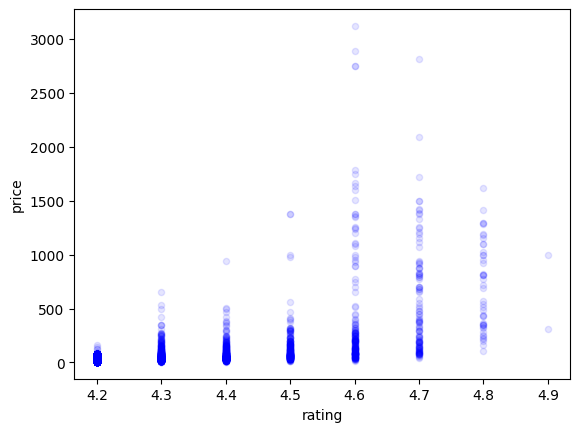

In [10]:
df.plot(kind="scatter", x="rating", y="price", color='b', alpha=0.1)

<Axes: xlabel='body', ylabel='price'>

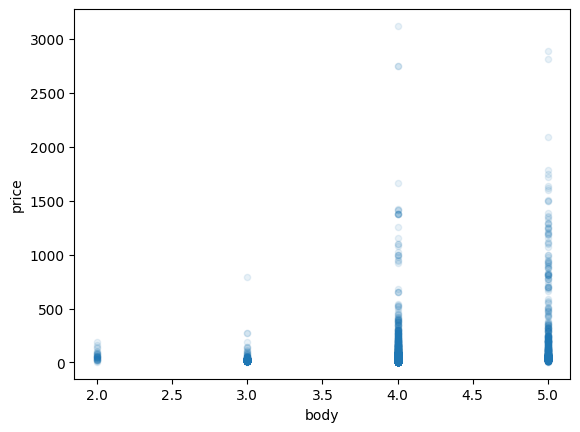

In [11]:
df.plot(kind="scatter", x= "body",y="price", alpha=0.1 )

<Axes: xlabel='acidity', ylabel='price'>

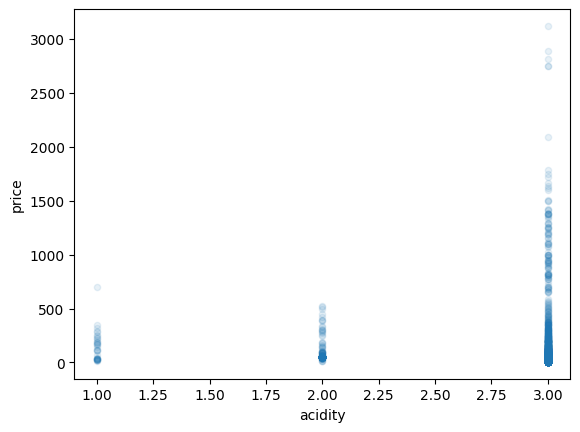

In [12]:
df.plot(kind="scatter", x="acidity", y="price", alpha=0.1)

<Axes: xlabel='body', ylabel='price'>

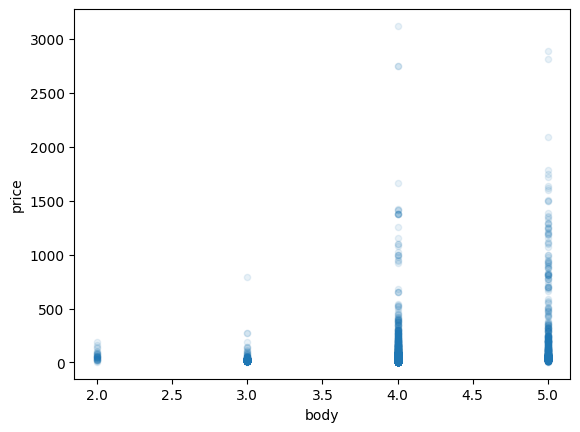

In [13]:
df.plot(kind="scatter", x="body", y="price", alpha=0.1)

<Axes: xlabel='num_reviews', ylabel='price'>

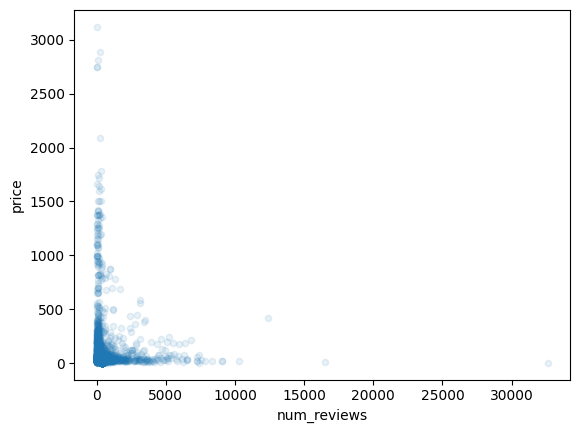

In [14]:
df.plot(kind="scatter", x="num_reviews", y="price", alpha=0.1)

Experimental Combinations:

Neither of these show a compelling relationship by visual alone.

<Axes: xlabel='rating', ylabel='year'>

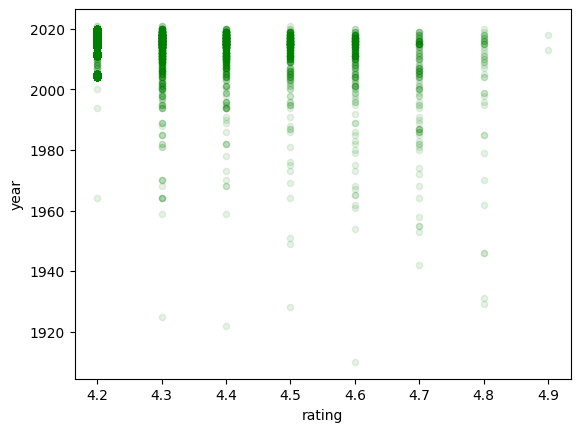

In [15]:
df.plot(kind="scatter", x="rating", y='year', color='g', alpha=0.1)

<Axes: xlabel='num_reviews', ylabel='year'>

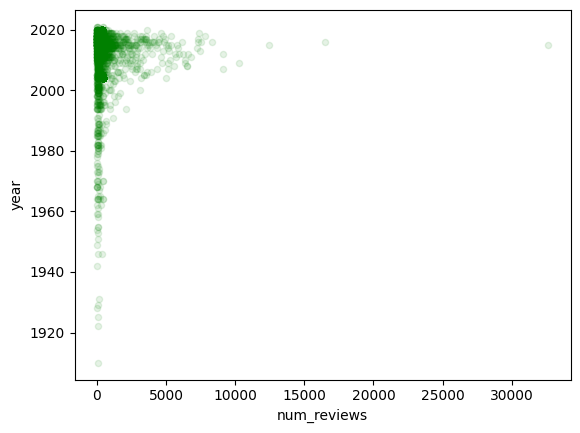

In [16]:
df.plot(kind="scatter", x="num_reviews", y='year', color='g', alpha=0.1)

In [17]:
df.corr()["price"].sort_values(ascending=False)

price              1.000000
rating_per_year    0.569600
rating             0.544809
body               0.161068
num_reviews       -0.030083
acidity           -0.039905
year              -0.388726
Name: price, dtype: float64

# Preprocessing and Preperation

Defines pipelines, removes some attributes from dataframe (those that actively hurt performance).

Includes a pipeline to train models in polynomial features. (This did not improve model r2 score noticably.)
\
LinearRegression \
DecisionTreeRegressor \
RandomForestRegressor \
ElasticNet \
SGDRegressor \
KNeighborsRegressor\
\
These models did not perform well generally, if they did well the models were consistantly overfitting.

In [18]:
from sklearn.model_selection import train_test_split

X= df.drop("price", axis=1)
y= df["price"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

num_std_attribs = ['rating_per_year', ]
num_maxmin_attribs = [ 'year', 'rating' ]
cat_attribs = ["body", ]

# Considered making a seperate pipeline to drop these, more trouble than it was worth.
# These features actively harmed the accuracy of the models.
delete_attribs = ["num_reviews", "acidity",]
X_train.drop(columns=delete_attribs, inplace=True)
X_test.drop(columns=delete_attribs, inplace=True)

### Pipelines

Pipelines as they were implemented in class.

In [20]:
from sklearn.compose import ColumnTransformer

#Numerical Features
numeric_std_pipeline = Pipeline([('imputer', SimpleImputer(strategy='median')),
                                  ('stdscaler', StandardScaler())])

numeric_minmax_pipeline = Pipeline([('imputer', SimpleImputer(strategy='median')),
                                    ('minmaxscaler', MinMaxScaler())])

#Categorical Features
cat_pipeline = Pipeline([('onehot', OneHotEncoder())])

full_transformer = ColumnTransformer([('numeric_stdpreprocessing', numeric_std_pipeline, num_std_attribs),
                                ('numeric_minmaxpreprocessing', numeric_minmax_pipeline, num_maxmin_attribs),
                                 ('cat_preprocessing', cat_pipeline, cat_attribs)
                                ])

In [21]:
from sklearn.preprocessing import PolynomialFeatures

num_attribs = num_std_attribs + num_maxmin_attribs

#Polynomial Features
poly_pipeline = Pipeline([('imputer', SimpleImputer(strategy='median')),
                          ('poly_features', PolynomialFeatures(degree=3, include_bias=False))
                          ])



In [22]:
from sklearn.compose import ColumnTransformer

full_transformer_poly = ColumnTransformer([ ('poly_features', poly_pipeline, num_attribs),
                                            ('numeric_stdpreprocessing', numeric_std_pipeline, num_std_attribs),
                                            ('numeric_minmaxpreprocessing', numeric_minmax_pipeline, num_maxmin_attribs),
                                            ('cat_preprocessing', cat_pipeline, cat_attribs)
                                         ])

### On the fit_and_print

I am convinced that the r2 score is not relevant to the accurate analysis of these models.  The data is inundated with outliers that severely scew and warp the output of the r2 score.  So for these models I will be anaylizing based solely off of the MAE.

In [23]:
#For regression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math

def fit_and_print(p, train_set, train_labels, test_set, test_labels):
  p.fit(train_set, train_labels)
  train_preds = p.predict(train_set)
  test_preds = p.predict(test_set)
  print("Training Error MAE: " + str(mean_absolute_error(train_preds, train_labels)))
  print("Test Error MAE: " + str(mean_absolute_error(test_preds, test_labels)))
  # print("R2 score train: " + str(r2_score(train_preds, train_labels)))
  # print("R2 score: " + str(r2_score(test_preds, test_labels)))

### Linear Regression
Model without polynomial features, and then model with polynomial features.
* Severe overfitting for both trial,
* Polynomial features improved the model.

In [24]:
from sklearn.linear_model import LinearRegression

p1_full_pipeline = Pipeline([('all_column_transformation', full_transformer),
                        ('linear_regression', LinearRegression())
                      ])

fit_and_print(p1_full_pipeline, X_train, y_train, X_test, y_test)

Training Error MAE: 39.577543138764995
Test Error MAE: 38.155719999133325


In [25]:
from sklearn.linear_model import LinearRegression

p2_full_pipeline = Pipeline([('all_column_transformation_poly', full_transformer_poly),
                        ('linear_regression', LinearRegression())
                      ])
fit_and_print(p2_full_pipeline, X_train, y_train, X_test, y_test)

Training Error MAE: 31.605131741242065
Test Error MAE: 30.565990670891356


### Random Forest Regressor

Overfits. \
\
Similar plan to decision tree regression accept, it is an ensemble model.

In [26]:
from sklearn.ensemble import RandomForestRegressor

p3_full_pipeline = Pipeline([('all_column_transformation_poly', full_transformer),
                        ('linear_regression', RandomForestRegressor())
                      ])
fit_and_print(p3_full_pipeline, X_train, y_train, X_test, y_test)

Training Error MAE: 20.101800165963493
Test Error MAE: 29.513614743733818


In [27]:
p4_full_pipeline = Pipeline([('all_column_transformation_poly', full_transformer_poly),
                        ('linear_regression', RandomForestRegressor())
                      ])
fit_and_print(p3_full_pipeline, X_train, y_train, X_test, y_test)

Training Error MAE: 20.143058980009936
Test Error MAE: 29.654670581977015


### ElasticNet
Adds elasticnet regularization to linear regression.

In [28]:
from sklearn.linear_model import ElasticNet

p5_full_pipeline = Pipeline([('all_column_transformation', full_transformer_poly),
                        ('elastic_regression', ElasticNet(alpha=0.1, l1_ratio=0.2))
                      ])

fit_and_print(p5_full_pipeline, X_train, y_train, X_test, y_test)

Training Error MAE: 38.569360201743386
Test Error MAE: 36.39100530312883


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.494e+07, tolerance: 1.449e+04
  model = cd_fast.enet_coordinate_descent(


### Decision Tree Regressor

Severe overfitting. Training Error MAE less than half Test Error MAE, r2 score for train trial also shows obvious signs of overfitting.\

\
Splits based off of features, creates 'rectangular' regions, doesn't actually create a normal line.

In [29]:
from sklearn.tree import DecisionTreeRegressor

p6_full_pipeline = Pipeline([('all_column_transformation', full_transformer),
                        ('decision_regression', DecisionTreeRegressor(criterion='friedman_mse'))
                      ])
fit_and_print(p6_full_pipeline, X_train, y_train, X_test, y_test)

Training Error MAE: 17.51085516653711
Test Error MAE: 31.49947799722926


### SGD Regressor
More overfitting. \
\
Stochastic Gradient Descent, formula: \
x_n = x_(n-1) - a * ∇f(x_(n-1))

In [30]:
from sklearn.linear_model import SGDRegressor

p4_full_pipeline = Pipeline([('all_column_transformation', full_transformer),
                        ('SGD_regression', SGDRegressor(penalty='l1'))
                      ])

fit_and_print(p6_full_pipeline, X_train, y_train, X_test, y_test)

Training Error MAE: 17.51085516653711
Test Error MAE: 32.18341133056259


### KNeighborsRegressor
Current best option: \
> Calculates the distance between new points and all old points using chosen algorithms. Finds the closest neighbors, and finds the weighted average to calculate the line.

In [31]:
from sklearn.neighbors import KNeighborsRegressor

p8_full_pipeline = Pipeline([('all_column_transformation', full_transformer),
                          ('KN_regression', KNeighborsRegressor())
                          ])

fit_and_print(p8_full_pipeline, X_train, y_train, X_test, y_test)

Training Error MAE: 24.629796196987996
Test Error MAE: 26.487770481089335


In [32]:
from sklearn.svm import SVR

SVR_full_pipeline = Pipeline([('all_column_transformation', full_transformer),
                          ('KN_regression', SVR())
                          ])

fit_and_print(SVR_full_pipeline, X_train, y_train, X_test, y_test)

Training Error MAE: 32.7229370068889
Test Error MAE: 31.910677077251158


# Grid Search

I chose 2 models as neither consistantly showed better performance than the other.


The first is KN_regression: 4 hyperparameters are to try different attempts with.\
* n_neighbors: Number of neighbors to use by default for kneighbors queries.\
* algorithm: Algorithm used to compute the nearest neighbors
* p: Power parameter for the Minkowski metric
* leaf_size: Leaf size passed to BallTree or KDTree. \
(Descriptions taken from scikit-learn docs)\
\
This does not give a particularly reasonable model. R2 score is very negative and MAE is as large as some of the cheapest drinks.

In [33]:
from sklearn.model_selection import GridSearchCV

KN_regression_full_pipeline = Pipeline([('all_column_transformation', full_transformer),
                          ('KN_regression', KNeighborsRegressor())
                          ])

# Define the parameter grid to search
param_grid = [
              {'KN_regression__n_neighbors': [2, 5, 10, 15, 20, 25, 30],
               'KN_regression__algorithm': ["ball_tree", "kd_tree", "brute", "auto"],
               'KN_regression__p': [1, 2],
               'KN_regression__leaf_size': [10, 20, 30, 40, 50]
              }
            ]

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=KN_regression_full_pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')

In [34]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('all_column_transformation',
                                        ColumnTransformer(transformers=[('numeric_stdpreprocessing',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('stdscaler',
                                                                                          StandardScaler())]),
                                                                         ['rating_per_year']),
                                                                        ('numeric_minmaxpreprocessing',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('minmaxsc...
                                                                        ('cat_preprocessing',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder())]),
                                                                         ['body'])])),
                                       ('KN_regression',
                                        KNeighborsRegressor())]),
             param_grid=[{'KN_regression__algorithm': ['ball_tree', 'kd_tree',
                                                       'brute', 'auto'],
                          'KN_regression__leaf_size': [10, 20, 30, 40, 50],
                          'KN_regression__n_neighbors': [2, 5, 10, 15, 20, 25,
                                                         30],
                          'KN_regression__p': [1, 2]}],
             scoring='neg_mean_absolute_error')

In [35]:
# Best parameters found
print("Best parameters found:")
print(grid_search.best_params_)
print(grid_search.best_score_)

Best parameters found:
{'KN_regression__algorithm': 'kd_tree', 'KN_regression__leaf_size': 10, 'KN_regression__n_neighbors': 20, 'KN_regression__p': 2}
-27.218413014071587


In [36]:
gscv_KN_full_pipeline = Pipeline([('all_column_transformation', full_transformer),
                          ('KN_regression', KNeighborsRegressor(algorithm='kd_tree', leaf_size=10, n_neighbors=20, p=2))
                          ])

fit_and_print(gscv_KN_full_pipeline, X_train, y_train, X_test, y_test)

Training Error MAE: 26.577777007616
Test Error MAE: 24.959446845925335


### Polynomial Test

In [39]:
from sklearn.model_selection import GridSearchCV

KN_regression_full_pipeline = Pipeline([('all_column_transformation', full_transformer_poly),
                          ('KN_regression', KNeighborsRegressor())
                          ])

# Define the parameter grid to search
param_grid = [
              {'KN_regression__n_neighbors': [2, 5, 10, 15, 20, 25, 30],
               'KN_regression__algorithm': ["ball_tree", "kd_tree", "brute", "auto"],
               'KN_regression__p': [1, 2],
               'KN_regression__leaf_size': [10, 20, 30, 40, 50]
              }
            ]

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=KN_regression_full_pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')

In [40]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('all_column_transformation',
                                        ColumnTransformer(transformers=[('poly_features',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('poly_features',
                                                                                          PolynomialFeatures(degree=3,
                                                                                                             include_bias=False))]),
                                                                         ['rating_per_year',
                                                                          'year',
                                                                          'rating']),
                                                                        ('numeric_stdpreprocessing',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleI...
                                                                        ('cat_preprocessing',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder())]),
                                                                         ['body'])])),
                                       ('KN_regression',
                                        KNeighborsRegressor())]),
             param_grid=[{'KN_regression__algorithm': ['ball_tree', 'kd_tree',
                                                       'brute', 'auto'],
                          'KN_regression__leaf_size': [10, 20, 30, 40, 50],
                          'KN_regression__n_neighbors': [2, 5, 10, 15, 20, 25,
                                                         30],
                          'KN_regression__p': [1, 2]}],
             scoring='neg_mean_absolute_error')

In [41]:
# Best parameters found
print("Best parameters found:")
print(grid_search.best_params_)
print(grid_search.best_score_)

Best parameters found:
{'KN_regression__algorithm': 'ball_tree', 'KN_regression__leaf_size': 20, 'KN_regression__n_neighbors': 25, 'KN_regression__p': 1}
-29.890860486861065


In [43]:
gscv_KN_full_pipeline = Pipeline([('all_column_transformation', full_transformer_poly),
                          ('KN_regression', KNeighborsRegressor(algorithm='ball_tree', leaf_size=20, n_neighbors=25, p=1))
                          ])

fit_and_print(gscv_KN_full_pipeline, X_train, y_train, X_test, y_test)

Training Error MAE: 28.739488815513333
Test Error MAE: 28.476173632413868


# Conclusion / Results

This dataset has a large number of outliers that prevent the r2 score from being useful as a metric.  The MAE (which is far less suceptable to outliers) is used instead to evaluate model performance. \
\
Stratified sampiling was not used as it did not make sense for this dataset. \
\
With this in mind I chose KN_regression as it had the smallest MAE for both train and test. The grid search cv does not provide any significant improvement. \
\
Polynomial features did not significantly improve model performance, but it did bring the difference between train and test error down to the decimal places without making it much worse.  So there is an argument that this model may infact be better.